In [1]:
import pandas as pd
import warnings 
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler

### 파일 불러오기

In [2]:
data = pd.read_excel("data/data_weather.xlsx")
data.head()

,타임스탬프,귀하의 성별은 무엇입니까?,귀하의 연령대는 무엇입니까?,귀하의 거주 지역은 어디입니까?,오늘 기분은 어떠십니까?,1순위 음식 분야,2순위 음식 분야,3순위 음식 분야,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온(°C),강수량(mm),습도(%),현지기압(hPa),전운량(10분위)
0,2021-05-16-14,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   타임스탬프              443 non-null    object 
 1   귀하의 성별은 무엇입니까?     443 non-null    object 
 2   귀하의 연령대는 무엇입니까?    443 non-null    object 
 3   귀하의 거주 지역은 어디입니까?  443 non-null    object 
 4   오늘 기분은 어떠십니까?      443 non-null    object 
 5   1순위 음식 분야          443 non-null    object 
 6   2순위 음식 분야          443 non-null    object 
 7   3순위 음식 분야          443 non-null    object 
 8   1_한식               208 non-null    object 
 9   2_한식               110 non-null    object 
 10  3_한식               77 non-null     object 
 11  1_분식               40 non-null     object 
 12  2_분식               44 non-null     object 
 13  3_분식               71 non-null     object 
 14  1_양식               81 non-null     object 
 15  2_양식               80 non-null     object 
 16  3_양식               98 non-

# 전처리

In [4]:
# 결측치 확인
data.isnull().sum()

타임스탬프                  0
귀하의 성별은 무엇입니까?         0
귀하의 연령대는 무엇입니까?        0
귀하의 거주 지역은 어디입니까?      0
오늘 기분은 어떠십니까?          0
1순위 음식 분야              0
2순위 음식 분야              0
3순위 음식 분야              0
1_한식                 235
2_한식                 333
3_한식                 366
1_분식                 403
2_분식                 399
3_분식                 372
1_양식                 362
2_양식                 363
3_양식                 345
1_일식                 356
2_일식                 317
3_일식                 333
1_중식                 416
2_중식                 360
3_중식                 356
기온(°C)                 0
강수량(mm)                0
습도(%)                  0
현지기압(hPa)              0
전운량(10분위)              0
dtype: int64

### 컬럼명 변경

In [5]:
data.columns

Index(['타임스탬프', '귀하의 성별은 무엇입니까?', '귀하의 연령대는 무엇입니까?', '귀하의 거주 지역은 어디입니까?',
       '오늘 기분은 어떠십니까?', '1순위 음식 분야', '2순위 음식 분야', '3순위 음식 분야', '1_한식', '2_한식',
       '3_한식', '1_분식', '2_분식', '3_분식', '1_양식', '2_양식', '3_양식', '1_일식', '2_일식',
       '3_일식', '1_중식', '2_중식', '3_중식', '기온(°C)', '강수량(mm)', '습도(%)',
       '현지기압(hPa)', '전운량(10분위)'],
      dtype='object')

In [6]:
data.rename(columns={'타임스탬프':'시간대',
                     '귀하의 성별은 무엇입니까?':'성별',
                     '귀하의 연령대는 무엇입니까?':'연령대',
                     '귀하의 거주 지역은 어디입니까?':'지역',
                     '오늘 기분은 어떠십니까?':'기분',
                     '1순위 음식 분야':'1순위',
                     '2순위 음식 분야':'2순위',
                     '3순위 음식 분야':'3순위',
                     '기온(°C)':'기온',
                     '강수량(mm)':'강수량',
                     '습도(%)':'습도',
                     '현지기압(hPa)':'기압',
                     '전운량(10분위)':'전운량'}, inplace=True)

In [7]:
data.head()

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온,강수량,습도,기압,전운량
0,2021-05-16-14,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


### 1순위 ,2순위,3순위 겹치는 열 제거

In [8]:
data=data[~((data["1순위"]==data["2순위"]) | (data["1순위"]==data["3순위"]) | (data["1순위"]==data["3순위"]))]

In [9]:
data.reset_index(drop=True,inplace=True)

In [10]:
data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온,강수량,습도,기압,전운량
0,2021-05-16-14,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24-16,남자,노년 (만 65세 이상),경상도,행복하다 · 즐겁다 · 신난다,한식,분식,중식,김치찌개,NaN,...,NaN,NaN,NaN,NaN,짬뽕,23.8,0.0,52.2,994.6,3
417,2021-05-24-16,남자,노년 (만 65세 이상),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,비빔밥,NaN,...,메밀소바,NaN,NaN,NaN,짜장면,22.1,0.0,45.1,999.9,1
418,2021-05-24-16,여자,노년 (만 65세 이상),전라도,행복하다 · 즐겁다 · 신난다,한식,중식,일식,비빔밥,NaN,...,NaN,돈가스,NaN,볶음밥,NaN,22.7,0.0,57.0,997.9,1
419,2021-05-24-16,남자,노년 (만 65세 이상),전라도,우울하다 · 피곤하다 · 힘들다,분식,양식,일식,NaN,NaN,...,NaN,메밀소바,NaN,NaN,NaN,22.7,0.0,57.0,997.9,1


### 날짜, 시간 열 추가

In [11]:
# data['시간대'] = pd.to_datetime(data['시간대'])

In [12]:
# data['월'] = data['시간'].dt.month
# data['일'] = data['시간'].dt.day
# data['시'] = data['시간'].dt.hour
# data['분'] = data['시간'].dt.minute

In [13]:
# data['날짜'] = data['시간대'].dt.strftime('%m-%d')
# data['시간'] = data['시간대'].dt.strftime('%H')

### 입력 데이터 값 전처리

In [14]:
data.loc[(data['지역']=='수도권 (경기, 인천)'), '지역'] = '수도권'
data.loc[(data['연령대']=='청소년 (~만 19세 미만)'), '연령대'] = '청소년'
data.loc[(data['연령대']=='청년 (만 19세~만 34세 이하)'), '연령대'] = '청년'
data.loc[(data['연령대']=='중장년 (만 35세~만 64세 이하)'), '연령대'] = '중장년'
data.loc[(data['연령대']=='노년 (만 65세 이상)'), '연령대'] = '노년'

In [15]:
data.loc[(data['기분']=='행복하다 · 즐겁다 · 신난다'), '기분'] = '행복'
data.loc[(data['기분']=='화가 난다 · 짜증난다'), '기분'] = '분노'
data.loc[(data['기분']=='아무 생각 없다'), '기분'] = '중립'
data.loc[(data['기분']=='우울하다 · 피곤하다 · 힘들다'), '기분'] = '우울'

In [16]:
data.head()

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온,강수량,습도,기압,전운량
0,2021-05-16-14,남자,청년,수도권,행복,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년,서울,분노,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년,서울,중립,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년,서울,행복,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년,경상도,행복,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


# 더미화 (One-Hot Encoding)

In [17]:
# 사용자가 선택한 메뉴만 뽑아내어 split 하는 Code

menu_data = data.iloc[:, 8:23]

for i in range(len(menu_data)):
    menu_data.iloc[i] = menu_data.iloc[i].str.split(', ')
    
menu_data

,1_한식,2_한식,3_한식,1_분식,2_분식,3_분식,1_양식,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식
0,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,[짬뽕]
1,[불고기],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[메밀소바],NaN,[볶음밥],NaN
2,NaN,NaN,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,[스테이크],NaN,"[돈가스, 메밀소바]",NaN,NaN,NaN,NaN,NaN
3,NaN,[비빔밥],NaN,NaN,NaN,[떡볶이],NaN,NaN,NaN,[초밥],NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,[떡볶이],[햄버거],NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,[김치찌개],NaN,NaN,NaN,[김밥],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[짬뽕]
417,[비빔밥],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[메밀소바],NaN,NaN,NaN,[짜장면]
418,[비빔밥],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[돈가스],NaN,[볶음밥],NaN
419,NaN,NaN,NaN,[떡볶이],NaN,NaN,NaN,[햄버거],NaN,NaN,NaN,[메밀소바],NaN,NaN,NaN


In [18]:
# 각 행의 메뉴를 한 리스트로 합치고, 이를 각 행 번호를 key로 갖는 딕셔너리로 만드는 Code

tmp_list = []
menu_dic = {}

for i in range(len(menu_data)):
    temp = menu_data.loc[i]
    for j in range(len(temp)):
        
        if type(temp.iloc[j]) == list:
            
            tmp_list += temp.iloc[j]
    
    menu_dic[i] = tmp_list
    tmp_list = []

In [19]:
# 각 카테고리에 해당하는 메뉴는 처음에 0으로 만들고,
## 사용자가 선택한 데이터를 1로 만드는 Code

category_dic = {'한식': ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개'],
          '분식': ['떡볶이', '김밥'],
          '양식': ['파스타', '스테이크', '햄버거'],
          '일식': ['초밥', '우동', '메밀소바', '돈가스'],
          '중식': ['볶음밥', '짬뽕', '짜장면']}

menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타',
'스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

result_df = pd.DataFrame(columns=menu_list)

for i in range(len(data)):
    result_df.loc[i, category_dic[data.loc[i, '1순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '2순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '3순위']]] = 0 
    

    
    result_df.loc[i, menu_dic[i]] = 1
    
    ##가중치 적용 
    result_df.loc[i, category_dic[data.loc[i, '1순위']]]=result_df.loc[i, category_dic[data.loc[i, '1순위']]]*3
    result_df.loc[i, category_dic[data.loc[i, '2순위']]]=result_df.loc[i, category_dic[data.loc[i, '2순위']]]*2
    result_df.loc[i, category_dic[data.loc[i, '3순위']]]=result_df.loc[i, category_dic[data.loc[i, '3순위']]]*1
     
result_df=result_df.fillna(0)
result_df

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,3,0,0,0,0,3,0,0,0,0,0,2,0,0,2,0,0,1
1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0
2,1,0,0,0,0,1,0,0,0,2,0,0,0,3,3,0,0,0
3,0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,3,2,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,1
417,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,1,0
418,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,2,0,0
419,0,0,0,0,0,0,3,0,0,0,2,0,0,1,0,0,0,0


In [20]:
result_df.iloc[370]

불고기     0
냉면      0
칼국수     0
된장찌개    3
비빔밥     0
김치찌개    3
떡볶이     0
김밥      0
파스타     0
스테이크    0
햄버거     0
초밥      0
우동      1
메밀소바    0
돈가스     1
볶음밥     0
짜장면     2
짬뽕      2
Name: 370, dtype: int64

In [21]:
result_df.count()

불고기     421
냉면      421
칼국수     421
된장찌개    421
비빔밥     421
김치찌개    421
떡볶이     421
김밥      421
파스타     421
스테이크    421
햄버거     421
초밥      421
우동      421
메밀소바    421
돈가스     421
볶음밥     421
짜장면     421
짬뽕      421
dtype: int64

In [22]:
result_df

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,3,0,0,0,0,3,0,0,0,0,0,2,0,0,2,0,0,1
1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0
2,1,0,0,0,0,1,0,0,0,2,0,0,0,3,3,0,0,0
3,0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,3,2,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,1
417,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,1,0
418,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,2,0,0
419,0,0,0,0,0,0,3,0,0,0,2,0,0,1,0,0,0,0


In [23]:
result_df.mean()*100

불고기     81.710214
냉면      49.168646
칼국수     36.817102
된장찌개    59.619952
비빔밥     67.695962
김치찌개    57.957245
떡볶이     53.444181
김밥      27.078385
파스타     61.045131
스테이크    52.969121
햄버거     40.142518
초밥      81.710214
우동      35.629454
메밀소바    49.406176
돈가스     57.244656
볶음밥     23.277910
짜장면     37.529691
짬뽕      37.529691
dtype: float64

## 최종 dataset 만들기

In [24]:
info = data.iloc[:, :8]
info

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위
0,2021-05-16-14,남자,청년,수도권,행복,한식,일식,중식
1,2021-05-16-15,여자,중장년,서울,분노,한식,중식,일식
2,2021-05-16-15,남자,청년,서울,중립,일식,양식,한식
3,2021-05-16-15,여자,청년,서울,행복,일식,한식,분식
4,2021-05-16-16,남자,청년,경상도,행복,양식,일식,분식
...,...,...,...,...,...,...,...,...
416,2021-05-24-16,남자,노년,경상도,행복,한식,분식,중식
417,2021-05-24-16,남자,노년,수도권,행복,한식,일식,중식
418,2021-05-24-16,여자,노년,전라도,행복,한식,중식,일식
419,2021-05-24-16,남자,노년,전라도,우울,분식,양식,일식


In [25]:
weather = data.iloc[:, -5:]
weather

,기온,강수량,습도,기압,전운량
0,17.5,1.6,99.1,993.6,10
1,18.5,1.4,97.0,989.6,10
2,18.5,1.4,97.0,989.6,10
3,18.5,1.4,97.0,989.6,10
4,20.6,2.6,94.7,990.5,10
...,...,...,...,...,...
416,23.8,0.0,52.2,994.6,3
417,22.1,0.0,45.1,999.9,1
418,22.7,0.0,57.0,997.9,1
419,22.7,0.0,57.0,997.9,1


### 필요한 컬럼만 concat

In [26]:
d1 = pd.concat([info, weather], axis=1)

In [27]:
final_data = pd.concat([d1, result_df], axis=1)

In [28]:
final_data['시간대']

0      2021-05-16-14
1      2021-05-16-15
2      2021-05-16-15
3      2021-05-16-15
4      2021-05-16-16
           ...      
416    2021-05-24-16
417    2021-05-24-16
418    2021-05-24-16
419    2021-05-24-16
420    2021-05-24-16
Name: 시간대, Length: 421, dtype: object

In [29]:
# 시간대를 datetime 타입으로 변경

final_data['시간대'] = pd.to_datetime(final_data['시간대'])

In [30]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대     421 non-null    datetime64[ns]
 1   성별      421 non-null    object        
 2   연령대     421 non-null    object        
 3   지역      421 non-null    object        
 4   기분      421 non-null    object        
 5   1순위     421 non-null    object        
 6   2순위     421 non-null    object        
 7   3순위     421 non-null    object        
 8   기온      421 non-null    float64       
 9   강수량     421 non-null    float64       
 10  습도      421 non-null    float64       
 11  기압      421 non-null    float64       
 12  전운량     421 non-null    int64         
 13  불고기     421 non-null    int64         
 14  냉면      421 non-null    int64         
 15  칼국수     421 non-null    int64         
 16  된장찌개    421 non-null    int64         
 17  비빔밥     421 non-null    int64         
 18  김치찌개    42

### 날짜, 시간, 요일 컬럼 추가

In [31]:
final_data['날짜'] = final_data['시간대'].dt.strftime('%m-%d')
final_data['시간'] = final_data['시간대'].dt.strftime('%H')
final_data['요일'] = final_data['시간대'].dt.dayofweek

In [32]:
final_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,6
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,6
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,6
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,6
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,0,0,0,0,0,0,1,05-24,16,0
417,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0,0,2,0,0,1,0,05-24,16,0
418,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,0,0,0,1,2,0,0,05-24,16,0
419,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0,0,1,0,0,0,0,05-24,16,0


### 요일을 한글로 변경

In [33]:
weekday = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

final_data.replace({'요일':weekday}, inplace=True)

In [34]:
final_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,0,0,0,0,0,0,1,05-24,16,월
417,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0,0,2,0,0,1,0,05-24,16,월
418,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,0,0,0,1,2,0,0,05-24,16,월
419,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0,0,1,0,0,0,0,05-24,16,월


### 최종 dataset 저장

In [36]:
final_data.to_csv('data/final_data.csv',index=False)

# EDA

In [37]:
demo = data.iloc[:, 1:3]

In [38]:
demo

,성별,연령대
0,남자,청년
1,여자,중장년
2,남자,청년
3,여자,청년
4,남자,청년
...,...,...
416,남자,노년
417,남자,노년
418,여자,노년
419,남자,노년


In [39]:
demod = pd.get_dummies(demo)

In [40]:
demod

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
0,1,0,0,0,1,0
1,0,1,0,1,0,0
2,1,0,0,0,1,0
3,0,1,0,0,1,0
4,1,0,0,0,1,0
...,...,...,...,...,...,...
416,1,0,1,0,0,0
417,1,0,1,0,0,0
418,0,1,1,0,0,0
419,1,0,1,0,0,0


In [41]:
demodp = demod.corr(method='pearson')
demodp

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
성별_남자,1.000000,-1.000000,-0.034814,-0.056510,-0.043350,0.124815
성별_여자,-1.000000,1.000000,0.034814,0.056510,0.043350,-0.124815
연령대_노년,-0.034814,0.034814,1.000000,-0.191428,-0.296198,-0.225054
연령대_중장년,-0.056510,0.056510,-0.191428,1.000000,-0.420718,-0.319665
연령대_청년,-0.043350,0.043350,-0.296198,-0.420718,1.000000,-0.494621
연령대_청소년,0.124815,-0.124815,-0.225054,-0.319665,-0.494621,1.000000


<AxesSubplot:>

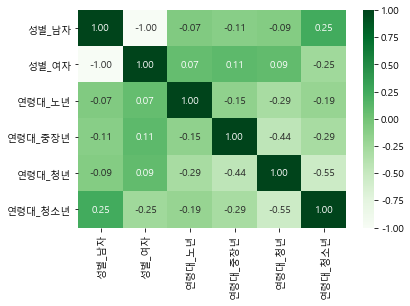

In [42]:
# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함
import platform
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')
sns.heatmap(demodp.corr(),
           annot = True,
           fmt = '.2f',
           cmap = 'Greens',
           vmin = -1, vmax=1)

In [43]:
# r=-1.000 ~ r=-0.600  높은 음의 상관관계
# r=-0.599 ~ r=-0.400  중간 음의 상관관계
# r=-3.999 ~ r=-0.200  낮은 음의 상관관계
# r=-0.199 ~ r=+0.199  무상관
# r=+0.200 ~ r=+0.399  낮은 양의 상관관계
# r=+0.400 ~ r=+0.599  중간 양의 상관관계
# r=+0.600 ~ r=+1.000  높은 양의 상관관계

#### 켄달

In [44]:
import scipy.stats as stats

# kendall
stats.kendalltau(data['성별'], data['연령대'])

KendalltauResult(correlation=-0.10371915632727802, pvalue=0.02124174568814406)

#### 스피어만

In [45]:
# spearman
stats.spearmanr(data['성별'], data['연령대'])

SpearmanrResult(correlation=-0.1124070904658218, pvalue=0.021062693301762116)

#### 켄달

In [46]:
corr = final_data.corr(method='kendall')

In [47]:
corr

,기온,강수량,습도,기압,전운량,불고기,냉면,칼국수,된장찌개,비빔밥,...,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
기온,1.000000,-0.321923,-0.605369,0.041740,-0.419594,-0.019616,0.044395,-0.048460,-0.090529,-0.044060,...,-0.024022,-0.045133,-0.085738,-0.074562,-0.078863,-0.033012,-0.095508,-0.025101,-0.091679,0.040551
강수량,-0.321923,1.000000,0.630708,-0.618969,0.672966,0.022761,0.018032,0.107686,0.084891,0.063240,...,0.038621,0.142182,0.097784,0.019630,0.076553,0.024241,0.068631,0.023826,0.117573,0.108429
습도,-0.605369,0.630708,1.000000,-0.349963,0.641174,0.029499,-0.019332,0.092956,0.052935,0.073215,...,0.013394,0.138163,0.078914,0.036778,0.086939,0.020756,0.080462,-0.008008,0.120730,0.057306
기압,0.041740,-0.618969,-0.349963,1.000000,-0.491826,0.017708,0.011624,-0.040755,-0.007086,-0.011758,...,0.038406,-0.064886,-0.051546,0.052661,0.000923,0.012880,0.013962,-0.020159,-0.071407,-0.113485
전운량,-0.419594,0.672966,0.641174,-0.491826,1.000000,-0.004185,-0.015483,0.083953,0.110146,0.006149,...,0.000554,0.091331,0.082058,0.038356,0.052892,0.001789,0.092071,0.049614,0.126709,0.079995
불고기,-0.019616,0.022761,0.029499,0.017708,-0.004185,1.000000,0.109347,0.004028,0.045600,0.007702,...,-0.023720,0.063783,0.090801,0.013998,0.082804,0.003290,0.089738,0.043035,0.017979,-0.087572
냉면,0.044395,0.018032,-0.019332,0.011624,-0.015483,0.109347,1.000000,0.189939,0.045566,-0.011848,...,0.088332,0.040151,0.054976,0.126951,0.072983,0.221759,0.033843,-0.065017,-0.065277,-0.038041
칼국수,-0.048460,0.107686,0.092956,-0.040755,0.083953,0.004028,0.189939,1.000000,0.062457,0.106436,...,0.079686,0.070860,0.010284,0.051994,0.148793,0.088392,0.073280,-0.001391,-0.049926,0.001729
된장찌개,-0.090529,0.084891,0.052935,-0.007086,0.110146,0.045600,0.045566,0.062457,1.000000,0.041734,...,0.013458,0.067020,-0.023281,0.037532,0.146842,-0.020236,-0.000207,0.014213,-0.085891,-0.021624
비빔밥,-0.044060,0.063240,0.073215,-0.011758,0.006149,0.007702,-0.011848,0.106436,0.041734,1.000000,...,-0.017112,0.008961,-0.033443,0.012752,0.051815,0.042694,0.003572,-0.021857,-0.025693,-0.046703


<AxesSubplot:>

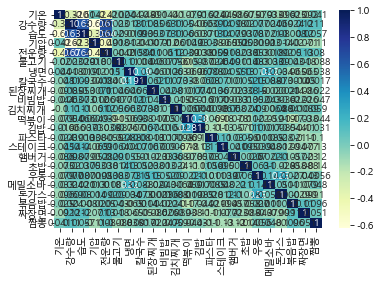

In [48]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True)

#### 스피어만

In [49]:
corr2 = final_data.corr(method='spearman')

<AxesSubplot:>

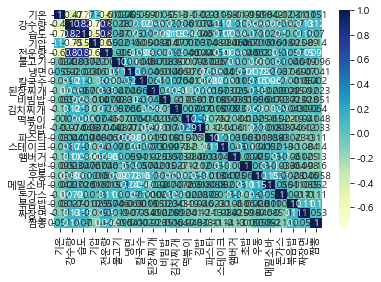

In [50]:
sns.heatmap(corr2,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True)